In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
data = pd.read_csv('fraud_CreditData1.csv')

In [3]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,6/21/2020 12:14,3.573030e+15,Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,6/21/2020 12:14,3.598220e+15,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,6/21/2020 12:15,3.591920e+15,Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,6/21/2020 12:15,3.526830e+15,Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
print(data.shape)
print(data.describe())

(555719, 23)
          Unnamed: 0        cc_num            amt            zip  \
count  555719.000000  5.557190e+05  555719.000000  555719.000000   
mean   277859.000000  4.178387e+17      69.392810   48842.628015   
std    160422.401459  1.309837e+18     156.745941   26855.283328   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    138929.500000  1.800430e+14       9.630000   26292.000000   
50%    277859.000000  3.521420e+15      47.290000   48174.000000   
75%    416788.500000  4.635330e+15      83.010000   72011.000000   
max    555718.000000  4.992350e+18   22768.110000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  555719.000000  555719.000000  5.557190e+05  5.557190e+05   
mean       38.543253     -90.231325  8.822189e+04  1.380679e+09   
std         5.061336      13.721780  3.003909e+05  5.201104e+06   
min        20.027100    -165.672300  2.300000e+01  1.371817e+09   
25%        34.668900     -96.798000  7.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  float64
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

0              0
1              1
2              2
3              3
4              4
           ...  
555714    555714
555715    555715
555716    555716
555717    555717
555718    555718
Name: Unnamed: 0, Length: 555719, dtype: int64

In [6]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time']).astype(int)/ 10**9

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['merchant'] = le.fit_transform(data.merchant)
data['gender'] = le.fit_transform(data.gender)
data['city'] = le.fit_transform(data.city)
data['state'] = le.fit_transform(data.state)
data['job'] = le.fit_transform(data.job)
data['category'] = le.fit_transform(data.category)


In [15]:
drop_col = ['first', 'last', 'street', 'dob', 'trans_num']
data.drop(drop_col, inplace=True, axis=1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  float64
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  int64  
 3   category               555719 non-null  int64  
 4   amt                    555719 non-null  float64
 5   gender                 555719 non-null  int64  
 6   city                   555719 non-null  int64  
 7   state                  555719 non-null  int64  
 8   zip                    555719 non-null  int64  
 9   lat                    555719 non-null  float64
 10  long                   555719 non-null  float64
 11  city_pop               555719 non-null  int64  
 12  job                    555719 non-null  int64  
 13  unix_time              555719 non-null  int64  
 14  merch_lat              555719 non-nu

In [17]:
fraud_trans = data[data['is_fraud'] == 1]
normal_trans = data[data['is_fraud'] == 0]

In [21]:
outlierFraction = (len(fraud_trans)/float(len(normal_trans)))*100
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['is_fraud'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['is_fraud'] == 0])))


0.3874820710510248
Fraud Cases: 2145
Valid Transactions: 553574


In [24]:
print('Amount details of the fraudulent transaction')
fraud_trans.amt.describe()

Amount details of the fraudulent transaction


count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: amt, dtype: float64

In [25]:
print('Amount details of the Normal transaction')
normal_trans.amt.describe()

Amount details of the Normal transaction


count    553574.000000
mean         67.614408
std         152.471931
min           1.000000
25%           9.600000
50%          47.150000
75%          82.620000
max       22768.110000
Name: amt, dtype: float64

<AxesSubplot:>

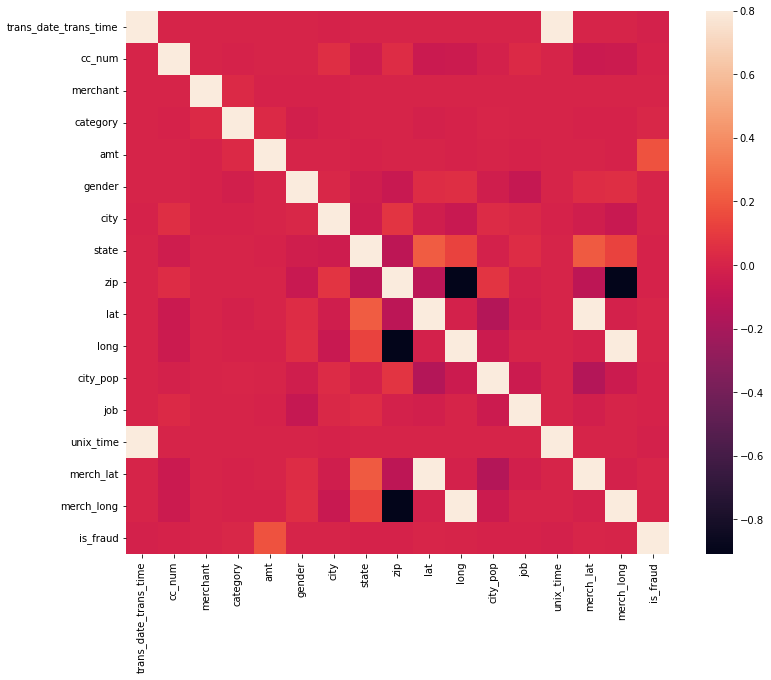

In [28]:
corr = data.corr()
plt.figure(figsize=(13,10))
sns.heatmap(corr, vmax = .8, square=True)

In [29]:
X = data.drop(['is_fraud'], axis=1)
Y = data['is_fraud']
print(X.shape)
print(Y.shape)

(555719, 16)
(555719,)


In [30]:
X

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long
0,1.592742e+09,2.291160e+15,319,10,2.86,1,157,39,29209,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714
1,1.592742e+09,3.573030e+15,591,10,29.84,0,16,43,84002,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431
2,1.592742e+09,3.598220e+15,611,5,41.28,0,61,33,11710,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111
3,1.592742e+09,3.591920e+15,222,9,60.05,1,764,8,32780,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061
4,1.592742e+09,3.526830e+15,292,13,3.19,1,247,21,49632,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,1.609459e+09,3.056060e+13,507,5,43.77,1,443,23,63453,40.4931,-91.8912,519,460,1388534347,39.946837,-91.333331
555715,1.609459e+09,3.556610e+15,264,7,111.84,1,401,42,77566,29.0393,-95.4401,28739,198,1388534349,29.661049,-96.186633
555716,1.609459e+09,6.011720e+15,496,7,86.88,0,104,46,99323,46.1966,-118.9017,3684,294,1388534355,46.658340,-119.715054
555717,1.609459e+09,4.079770e+12,75,13,7.99,1,476,12,83643,44.6255,-116.4493,129,58,1388534364,44.470525,-117.080888


In [31]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

In [32]:
xData = X.values
yData = Y.values

In [33]:
xData

array([[ 1.59274164e+09,  2.29116000e+15,  3.19000000e+02, ...,
         1.37181686e+09,  3.39863910e+01, -8.12007140e+01],
       [ 1.59274164e+09,  3.57303000e+15,  5.91000000e+02, ...,
         1.37181687e+09,  3.94504980e+01, -1.09960431e+02],
       [ 1.59274164e+09,  3.59822000e+15,  6.11000000e+02, ...,
         1.37181689e+09,  4.04958100e+01, -7.41961110e+01],
       ...,
       [ 1.60945914e+09,  6.01172000e+15,  4.96000000e+02, ...,
         1.38853436e+09,  4.66583400e+01, -1.19715054e+02],
       [ 1.60945914e+09,  4.07977000e+12,  7.50000000e+01, ...,
         1.38853436e+09,  4.44705250e+01, -1.17080888e+02],
       [ 1.60945914e+09,  4.17069000e+15,  1.25000000e+02, ...,
         1.38853437e+09,  3.62100970e+01, -9.70363720e+01]])

In [34]:
yData

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( xData, yData, test_size = 0.2, random_state = 42)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)

In [40]:
from sklearn.metrics import classification_report, accuracy_score

from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import f1_score, matthews_corrcoef

from sklearn.metrics import confusion_matrix

In [43]:
n_outliers = len(fraud_trans)

n_errors=(yPred != yTest).sum()

print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)

print('The accuracy is {}'.format(acc))

prec = precision_score(yTest, yPred)

print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)

print('The recall is {}'.format(rec))

f1 = f1_score(yTest, yPred)

print("The F1_Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred) 
print('The Matthews correlation coefficient is {}'.format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9984164687252574
The precision is 0.9528985507246377
The recall is 0.6173708920187794
The F1_Score is 0.7492877492877492
The Matthews correlation coefficient is 0.7663370321421019


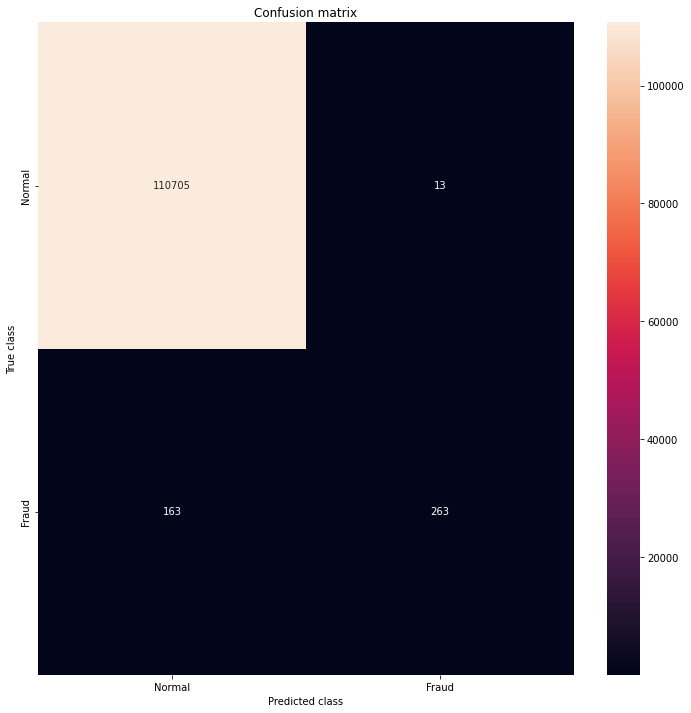

In [44]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
